____
__Universidad de San Andrés__<br/>
__Machine Learning__<br/>
__Trabajo Práctico 3: Redes Neuronales__<br/>
__Federico Gutman__
____

### Análisis y Preprocesamiento de Datos

#### Importamos las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.data_splitting as ds
import src.preprocessing as pr
import src.metrics as metrics
from src.models import NeuralNetwork
# importar con el * para prolijidad

In [2]:
# NOTAS

# VER BACKPROP
# HACER CROSS-VAL
# PULIR CODIGO, NOTEBOOK Y HACER INFORME [EL FINDE VA A HABER CONSULTAS]

In [3]:
X_images = np.load("data/X_images.npy")
y_images = np.load("data/y_images.npy")

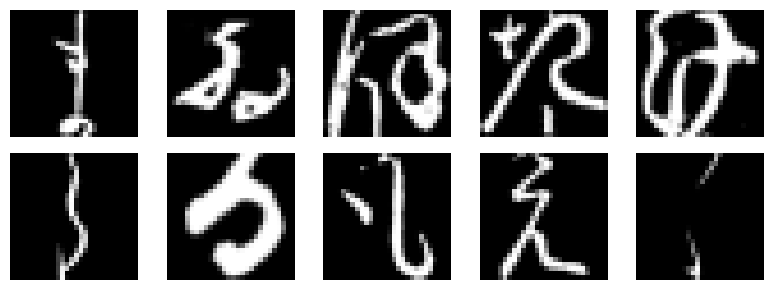

Number of images: 5000


In [4]:
nrows = 2
ncolumns = 5

fig, ax = plt.subplots(nrows, ncolumns, figsize=(8, 3))
for i in range(nrows):
    for k in range(ncolumns):
        ax[i, k].imshow(X_images[np.random.randint(0, len(X_images))].reshape(28, 28), cmap='grey')
        ax[i, k].axis('off')
plt.tight_layout()
plt.show()

print(f'Number of images: {len(X_images)}')


#### Dividimos el conjunto de datos en tres subconjuntos: Train, Validation y Test.

In [5]:
X_dev, X_test, y_dev, y_test = ds.dev_test_split(X_images, y_images)

X_dev = pr.normalize(X_dev)
X_test = pr.normalize(X_test) # no pasa nada q normalice aca xq solo los divido por un valor (no hay data leakage)

y_dev = pr.one_hot_encoding(y_dev)
y_test = pr.one_hot_encoding(y_test) # emprolijar esto

X_train, X_valid, y_train, y_valid = ds.train_valid_split(X_dev, y_dev)

#### Entrenamos la red neuronal

In [6]:
m0 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])  # ejemplo: 1 capa oculta de 128 nodos
m0.train(X_valid, y_valid, epochs=500, lr=0.1)
# si le subo las epocas accuracy valid se mantiene y train sube 

Epoch 1/500 - Loss: 3.9327 - Val Acc: 0.0200 - LR: 0.100000
Epoch 2/500 - Loss: 3.9204 - Val Acc: 0.0213 - LR: 0.100000
Epoch 3/500 - Loss: 3.9093 - Val Acc: 0.0238 - LR: 0.100000
Epoch 4/500 - Loss: 3.8992 - Val Acc: 0.0250 - LR: 0.100000
Epoch 5/500 - Loss: 3.8898 - Val Acc: 0.0213 - LR: 0.100000
Epoch 6/500 - Loss: 3.8810 - Val Acc: 0.0225 - LR: 0.100000
Epoch 7/500 - Loss: 3.8725 - Val Acc: 0.0225 - LR: 0.100000
Epoch 8/500 - Loss: 3.8643 - Val Acc: 0.0225 - LR: 0.100000
Epoch 9/500 - Loss: 3.8562 - Val Acc: 0.0275 - LR: 0.100000
Epoch 10/500 - Loss: 3.8483 - Val Acc: 0.0262 - LR: 0.100000
Epoch 11/500 - Loss: 3.8405 - Val Acc: 0.0262 - LR: 0.100000
Epoch 12/500 - Loss: 3.8328 - Val Acc: 0.0275 - LR: 0.100000
Epoch 13/500 - Loss: 3.8252 - Val Acc: 0.0300 - LR: 0.100000
Epoch 14/500 - Loss: 3.8177 - Val Acc: 0.0288 - LR: 0.100000
Epoch 15/500 - Loss: 3.8100 - Val Acc: 0.0350 - LR: 0.100000
Epoch 16/500 - Loss: 3.8023 - Val Acc: 0.0387 - LR: 0.100000
Epoch 17/500 - Loss: 3.7946 - Val

In [7]:
y_pred = m0.predict(X_train)

print('TRAINING SET ACCURACY')
metrics.accuracy(y_pred, y_train)
print('\n')

y_pred = m0.predict(X_valid)

print('VALIDATION SET ACCURACY')
metrics.accuracy(y_pred, y_valid)
print('\n')

# FALTA LOSS Y MATRIZ DE CONFUSION
# HACER UNA FUNCION QUE ME IMPRIMA TODO

TRAINING SET ACCURACY
Accuracy: 0.8021875


VALIDATION SET ACCURACY
Accuracy: 0.57625




#### Learning Rate scheduling

In [8]:
net = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])  # ejemplo: 1 capa oculta de 128 nodos
net.train(X_valid, y_valid, epochs=500, lr=0.1, scheduling_type='Linear')
# con lr = 1 caigo en un mejor pozo
y_pred = net.predict(X_valid)

print('VALIDATION SET ACCURACY')
metrics.accuracy(y_pred, y_valid)
print('\n')

net = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])  # ejemplo: 1 capa oculta de 128 nodos
net.train(X_valid, y_valid, epochs=500, lr=0.2, scheduling_type='Exp')

y_pred = net.predict(X_valid)

print('VALIDATION SET ACCURACY')
metrics.accuracy(y_pred, y_valid)
print('\n')

# ME DAN MISMA ACCURACY QUE M0 PERO EN MENOS EPOCAS

Epoch 1/500 - Loss: 3.9327 - Val Acc: 0.0200 - LR: 0.100000
Epoch 2/500 - Loss: 3.9204 - Val Acc: 0.0213 - LR: 0.099800
Epoch 3/500 - Loss: 3.9093 - Val Acc: 0.0238 - LR: 0.099600
Epoch 4/500 - Loss: 3.8992 - Val Acc: 0.0250 - LR: 0.099400
Epoch 5/500 - Loss: 3.8899 - Val Acc: 0.0213 - LR: 0.099200
Epoch 6/500 - Loss: 3.8812 - Val Acc: 0.0225 - LR: 0.099000
Epoch 7/500 - Loss: 3.8728 - Val Acc: 0.0225 - LR: 0.098800
Epoch 8/500 - Loss: 3.8647 - Val Acc: 0.0225 - LR: 0.098600
Epoch 9/500 - Loss: 3.8567 - Val Acc: 0.0288 - LR: 0.098400
Epoch 10/500 - Loss: 3.8488 - Val Acc: 0.0262 - LR: 0.098200
Epoch 11/500 - Loss: 3.8412 - Val Acc: 0.0262 - LR: 0.098000
Epoch 12/500 - Loss: 3.8337 - Val Acc: 0.0275 - LR: 0.097800
Epoch 13/500 - Loss: 3.8262 - Val Acc: 0.0288 - LR: 0.097600
Epoch 14/500 - Loss: 3.8189 - Val Acc: 0.0288 - LR: 0.097400
Epoch 15/500 - Loss: 3.8114 - Val Acc: 0.0338 - LR: 0.097200
Epoch 16/500 - Loss: 3.8039 - Val Acc: 0.0375 - LR: 0.097000
Epoch 17/500 - Loss: 3.7965 - Val

#### SGD mini batch b = 1

In [9]:
net = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])  # ejemplo: 1 capa oculta de 128 nodos
net.train(X_valid, y_valid, epochs=500, lr=0.2, batch_size=64) # EN REALIDAD B tiene que ser 1 [PREGUNTAR LO DE CROSS VALIDATION PARA Q LO USO]
y_pred = net.predict(X_valid)

print('VALIDATION SET ACCURACY')
metrics.accuracy(y_pred, y_valid)
print('\n')

Epoch 1/500 - Loss: 3.1830 - Val Acc: 0.2775 - LR: 0.200000
Epoch 2/500 - Loss: 2.5114 - Val Acc: 0.3800 - LR: 0.200000
Epoch 3/500 - Loss: 1.9489 - Val Acc: 0.4975 - LR: 0.200000
Epoch 4/500 - Loss: 1.8042 - Val Acc: 0.5100 - LR: 0.200000
Epoch 5/500 - Loss: 1.3317 - Val Acc: 0.5550 - LR: 0.200000
Epoch 6/500 - Loss: 1.4676 - Val Acc: 0.5625 - LR: 0.200000
Epoch 7/500 - Loss: 1.2536 - Val Acc: 0.5950 - LR: 0.200000
Epoch 8/500 - Loss: 0.8942 - Val Acc: 0.6025 - LR: 0.200000
Epoch 9/500 - Loss: 1.1744 - Val Acc: 0.5700 - LR: 0.200000
Epoch 10/500 - Loss: 0.8840 - Val Acc: 0.5837 - LR: 0.200000
Epoch 11/500 - Loss: 0.5300 - Val Acc: 0.5962 - LR: 0.200000
Epoch 12/500 - Loss: 0.5961 - Val Acc: 0.6150 - LR: 0.200000
Epoch 13/500 - Loss: 0.4693 - Val Acc: 0.5913 - LR: 0.200000
Epoch 14/500 - Loss: 0.3193 - Val Acc: 0.6262 - LR: 0.200000
Epoch 15/500 - Loss: 0.1843 - Val Acc: 0.5975 - LR: 0.200000
Epoch 16/500 - Loss: 0.2368 - Val Acc: 0.6088 - LR: 0.200000
Epoch 17/500 - Loss: 0.2129 - Val